In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [19]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape data to fit the LeNet architecture (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to categorical one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

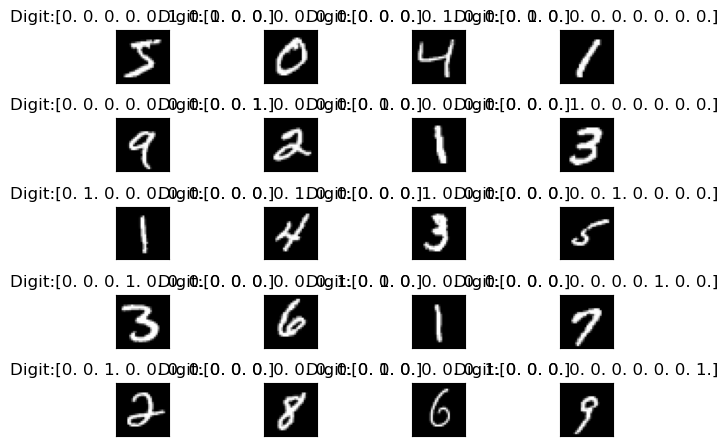

In [20]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()
plot_digits(x_train, y_train)

In [21]:
def build_lenet():
    model = models.Sequential()
    
    # First Convolutional Layer
    model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Second Convolutional Layer
    model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Flatten the output
    model.add(layers.Flatten())
    
    # Fully Connected Layers
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

# Create the model
lenet_model = build_lenet()

In [16]:
# Reshape the input data
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [10]:
def build_lenet():
    model = models.Sequential()
    
    # First Convolutional Layer
    model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Second Convolutional Layer
    model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Flatten the output
    model.add(layers.Flatten())
    
    # Fully Connected Layers
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

# Create the model
lenet_model = build_lenet()


C:\Users\sobhy\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
lenet_model.compile(optimizer='adam', 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy'])


In [17]:
history = lenet_model.fit(x_train, y_train, 
                          epochs=10, 
                          batch_size=128, 
                          validation_data=(x_test, y_test))


Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [ ]:
test_loss, test_acc = lenet_model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')